<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E7%A4%BE%E7%BE%A4%E5%85%B1%E5%AD%B8/Task%2002/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modual & dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df.head(10)
# df.shape  891 * 12

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# data observation
---
* 有75%以上有帶SibSp
* 只有極少數買到超過300元(3個)
* 38歲是Q3，65 ~ 80歲的不到1%

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
df[df['Fare'] > 300]['Fare'].count()

3

In [ ]:
df[df['Age'] > 65]['Age'].count()/len(df)

0.008978675645342313

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## count of the number of survivors

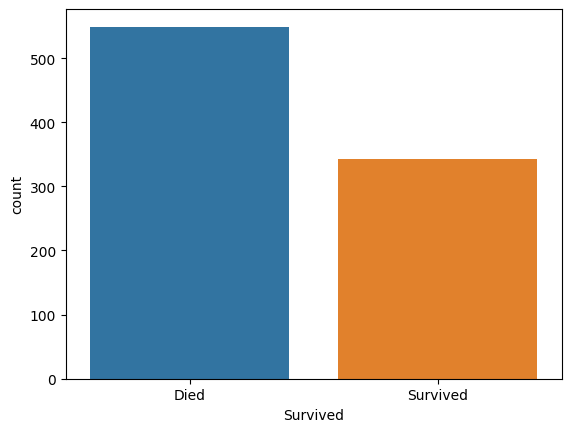

In [ ]:
df_copy = df.copy()
df_copy['Survived'].value_counts() # 0:549 1:342
sns.countplot(df_copy, x = 'Survived')
plt.xticks(ticks=[0, 1], labels=["Died", "Survived"])
plt.show()

## 按照不同類別對存活數作圖

'\n1. 女性存活率比男性高\n2. 高等倉存活率也較高\n3. 帶兄弟姊妹、夫妻的存活機率較高\n4. 帶小孩父母親的存活機率較高\n5. S出發的存活率較低，可能低價，離另外兩個出發點也遠\n'

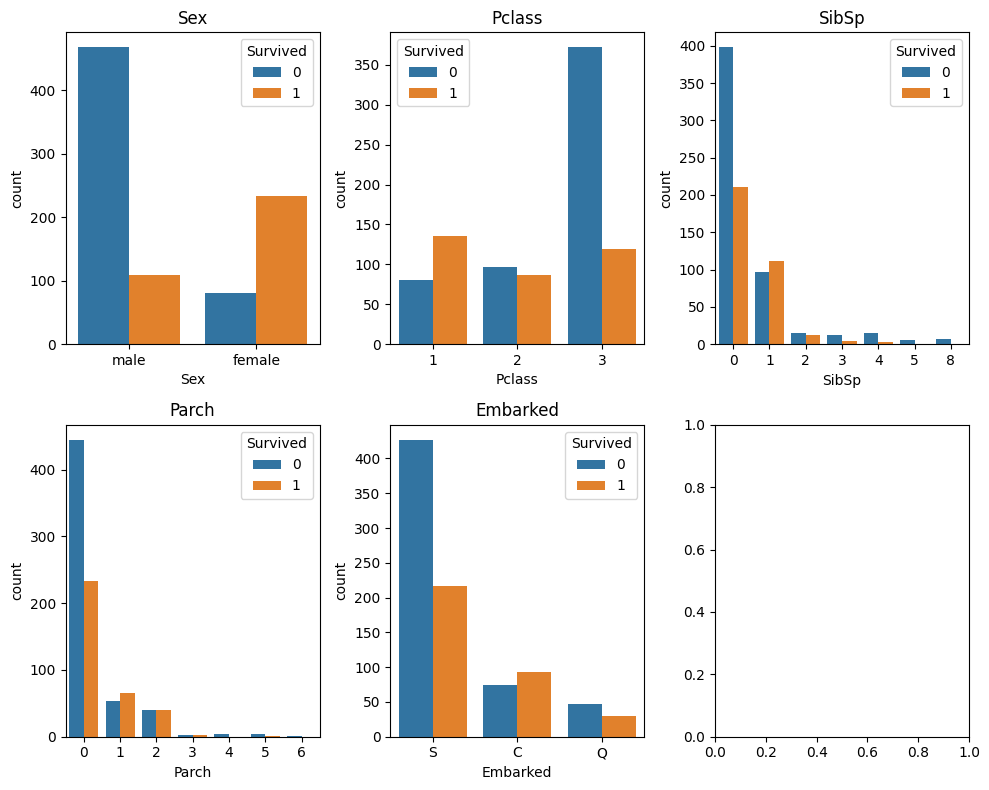

In [ ]:
features_col = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
Rows, Cols = 2, 3
fig, axs = plt.subplots(Rows, Cols, figsize = (10,8))
for r in range(Rows):
    for c in range(Cols):
        i = r * Cols + c
        if i < 5:
            ax = axs[r][c]
            sns.countplot(df_copy, x = features_col[i], hue = 'Survived', ax = ax)
            ax.set_title(features_col[i])
plt.tight_layout()
'''
1. 女性存活率比男性高
2. 高等倉存活率也較高
3. 帶兄弟姊妹、夫妻的存活機率較高
4. 帶小孩父母親的存活機率較高
5. S出發的存活率較低，可能低價，離另外兩個出發點也遠
'''

## 小結論
---
* 女性存活率遠大於男性 (74% > 19%)
* 艙位等級高存活率高 (63% > 47% > 24%)
* 女性各艙位存活率遠大於男性
* 年齡劃分沒有艙等、性別來的明顯，高等艙的女性在任何年齡幾乎有很高的存活率，男性則是青少年有較好的存活率

In [ ]:
# survival rate by sex
df_copy.pivot_table('Survived',index = 'Sex', aggfunc = {'Survived':'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# survival rate by Pclass
df_copy.pivot_table('Survived',index = 'Pclass', aggfunc = {'Survived':'mean'})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
# survival rate by sex + Pclass
df_copy.pivot_table('Survived',index = 'Sex', columns = 'Pclass', aggfunc = {'Survived':'mean'})

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# survival rate by sex + Pclass + age
age_range = pd.qcut(df_copy['Age'], 4)
df_copy.pivot_table('Survived',index = ['Sex', age_range], columns = 'Pclass', aggfunc = {'Survived':'mean'})

Pclass                         1         2         3
Sex    Age                                          
female (0.419, 20.125]  0.928571  1.000000  0.510638
       (20.125, 28.0]   0.933333  0.863636  0.538462
       (28.0, 38.0]     1.000000  0.950000  0.470588
       (38.0, 80.0]     0.968750  0.875000  0.083333
male   (0.419, 20.125]  0.571429  0.526316  0.197368
       (20.125, 28.0]   0.562500  0.000000  0.126582
       (28.0, 38.0]     0.500000  0.096774  0.169492
       (38.0, 80.0]     0.277778  0.083333  0.076923

# Correlation
---
* 性別對存活率有很大的影響程度(0.54) {男:0，女:1}
* 艙等對存活率有次等的負影響程度(-0.34) [3 < 2 < 1]
* 有帶小孩父母身分的稍微有點影響力(0.082)
* 出發地有一點影響(C >> Q、S)

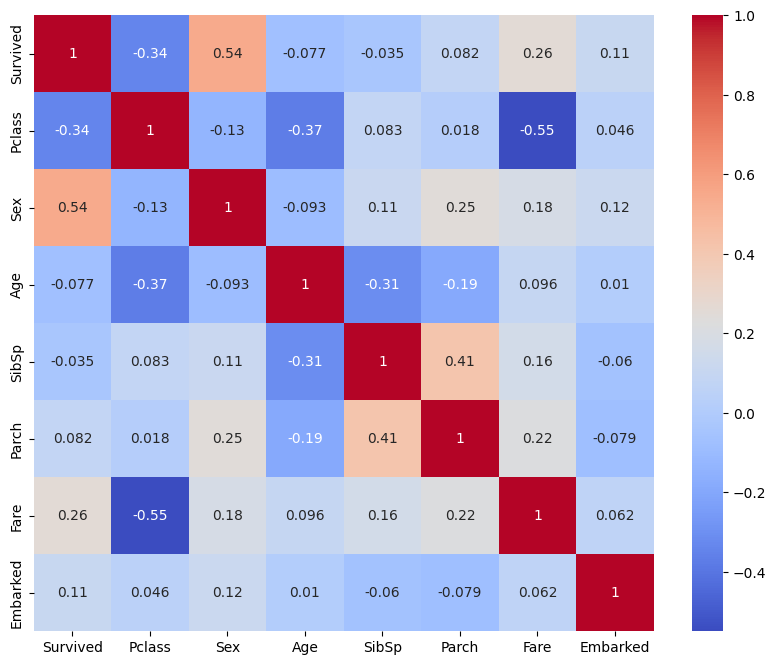

In [ ]:
# 去非必要資料
df_copy = df.copy()
df_copy = df_copy.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

# 性別轉類別數字
df_copy['Sex'] = df_copy['Sex'].replace({'male': 0, 'female': 1})

# 填補缺失值 : Embarked少2個
df_copy['Embarked'] = df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0])

# Embarked轉換成數字
df_copy['Embarked'] = df_copy['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df_numeric = df_copy.select_dtypes(include=['int64', 'float64'])

# 相關性分析
corr_matrix = df_numeric.corr()
plt.figure(figsize = (10 , 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

# Feature importance
---
* 性別 > 艙等 > 有沒有攜家帶眷

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 去除非必要欄位
df_copy = df.copy()
df_copy = df_copy.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

In [ ]:
# 性別轉類別數字
df_copy['Sex'] = df_copy['Sex'].replace({'male': 0, 'female': 1})

# 填補缺失值 : Embarked少2個
df_copy['Embarked'] = df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0])

# Embarked轉換成數字
df_copy['Embarked'] = df_copy['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

# 填補 'Age' 欄位的缺失值為中位數
df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].median())

In [ ]:
# 取出特徵欄位和目標欄位
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

# 建立隨機森林分類器
rf = RandomForestClassifier(random_state = 0)

# 特徵和目標資料分開
X = df_copy[features]
y = df_copy[target]

# 訓練模型
rf.fit(X, y)

RandomForestClassifier(random_state=0)

In [ ]:
# 取得特徵重要性
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# 顯示特徵重要性
print(feature_importance)

    Feature  Importance
1       Sex    0.509949
0    Pclass    0.202201
3     Parch    0.113688
2     SibSp    0.105410
4  Embarked    0.068752
